In [ ]:
"""removes punctuation, stopwords, and returns a list of the remaining words, or tokens"""
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Cleaning the text

import string

def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]

In [ ]:
## Mount Drive into Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#import the actual data
import pandas as pd

fpath = 'drive/My Drive/bioassays_for_clustering_w_non_bioassays.tsv'
bioassays_df = pd.read_csv(fpath, sep='\t', encoding = "ISO-8859-1")
bioassays_df.tail()

PubChemID                                           Text
1004       x90            q w e r t y u i o p [ ] a s 7 8 9 0
1005       x91  i o p [ ] a s ; ' z x c v b r t y u i 1 4 5 9
1006       x92                  ; ' z x c v b j k l 2 1 6 4 9
1007       x93                  n m , . / 1 2 g h j r t y u i
1008       x94  d f g h n m , . / z x c v b [ ] a s 5 2 9 1 5

In [ ]:
bioassays_df['Text preprocessed'] = bioassays_df['Text'].apply(text_process)
bioassays_df.head()

PubChemID  ...                                  Text preprocessed
0      2764  ...  [currently, small, molecule, tool, investigate...
1      1508  ...  [the, m, muscarinic, receptor, thought, import...
2       466  ...  [a, cell, line, containing, human, sp, recepto...
3      2665  ...  [muscarinic, acetylcholine, receptor, family, ...
4    504660  ...  [dopamine, receptor, dars, involved, etiology,...

[5 rows x 3 columns]

In [ ]:
bioassays_df['Text preprocessed str'] = bioassays_df['Text preprocessed'].apply(' '.join)
bioassays_df.head()

PubChemID  ...                              Text preprocessed str
0      2764  ...  currently small molecule tool investigate biol...
1      1508  ...  the m muscarinic receptor thought important th...
2       466  ...  a cell line containing human sp receptor well ...
3      2665  ...  muscarinic acetylcholine receptor family a gpc...
4    504660  ...  dopamine receptor dars involved etiology andor...

[5 rows x 4 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# tfidfconvert = TfidfVectorizer(analyzer=text_process,ngram_range=(1,3)).fit(bioassays_df['Text'])
tfidfconvert = TfidfVectorizer(ngram_range=(1,2)).fit(bioassays_df['Text preprocessed str'])
tfidfpath = 'drive/My Drive/tfidf-assay-vectorizer-model.pkl'
pickle.dump(tfidfconvert, open(tfidfpath, "wb"))
#tfidfconvert = pickle.load(open("drive/My Drive/tfidf-assay-vectorizer-model.pkl", "rb"))

bioassays_df_transformed=tfidfconvert.transform(bioassays_df['Text preprocessed str'])

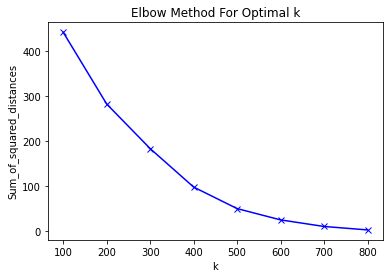

In [ ]:
#checking for optimal number of clusters
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(100,900,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(bioassays_df_transformed)
    Sum_of_squared_distances.append(km.inertia_)


import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
print(bioassays_df.at[0,'PubChemID'])

2764


In [ ]:
# Clustering the training sentences with K-means technique and saving the model
from sklearn.cluster import KMeans
import pickle

modelkmeans = KMeans(n_clusters=700, init='k-means++', random_state=42)
modelkmeans.fit(bioassays_df_transformed)
mpath = 'drive/My Drive/assay-semantification-k-means-model.pkl'
pickle.dump(modelkmeans, open(mpath, "wb"))

In [ ]:
# Clustering the training sentences with K-means technique and saving the model
from sklearn.cluster import KMeans
import pickle

modelkmeans = pickle.load(open("drive/My Drive/assay-semantification-k-means-model.pkl", "rb"))

In [ ]:
label = modelkmeans.predict(bioassays_df_transformed)

In [ ]:
print(label)

[  9 255  98 ...  10  10  10]


In [ ]:
import os

top_dir = 'drive/My Drive/clusters_output_700'

if not os.path.exists(top_dir):
  os.makedirs(top_dir)

i = 0
for lab in label:

  file = open(top_dir+'/'+str(lab)+'.txt', 'a+')

  file.write(str(bioassays_df.at[i,'PubChemID'])+'\n')

  i = i + 1



